In [1]:
import logging
from pathlib import Path

from typing import Optional

import numpy as np
import pandas as pd
from scipy.integrate import simpson

In [2]:
# путь к данным
path_to_data = Path(Path.cwd().parent, 
                    "data", 
                    "results")

## pm2.5, 2018 год

In [3]:
# читаем
df = pd.read_csv(Path(path_to_data, 
                      "result_pm2_5_2018.csv"))

#### ЗНС(55.7, 36.8)

In [4]:
# отсекаем координаты и сортируем
df_zns = df[(df['lat'] == 55.7) & (df['lon'] == 36.8)].sort_values(["time", "level"],
                                                                   ascending=True)

In [5]:
# создаём функцию агрегации, которая интегрирует методом Симпсона
def calc_int(x):
    substance = x["pm2p5"].to_list()
    lev = x["level"].to_list()
    return pd.Series({"calc_int_simp": simpson(y=substance, x=lev)})

In [6]:
df_int_zns = df_zns.groupby(["time"]).apply(calc_int, 
                                      include_groups=False)

In [7]:
df_int_zns.head()

,calc_int_simp
time,
2018-01-01 00:00:00,4874.092594
2018-01-01 01:00:00,5275.037992
2018-01-01 02:00:00,6202.856657
2018-01-01 03:00:00,6712.680451
2018-01-01 04:00:00,6049.950077


<Axes: xlabel='time'>

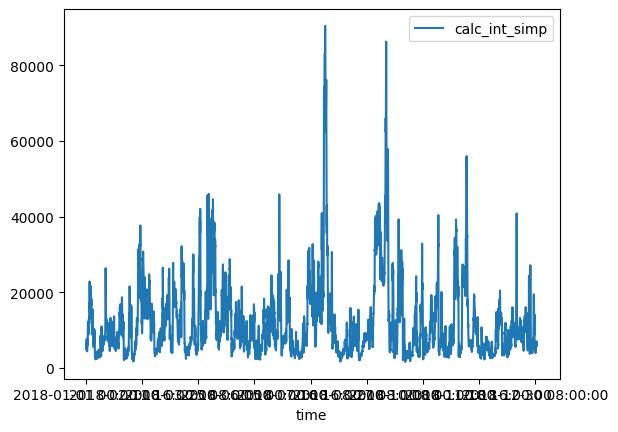

In [8]:
df_int_zns.plot()

#### ИФА(55.7, 37.5)

In [9]:
# отсекаем координаты и сортируем
df_ifa = df[(df['lat'] == 55.7) & (df['lon'] == 37.5)].sort_values(["time", "level"],
                                                                 ascending=True)

In [10]:
# создаём функцию агрегации, которая интегрирует методом Симпсона
def calc_int(x):
    substance = x["pm2p5"].to_list()
    lev = x["level"].to_list()
    return pd.Series({"calc_int_simp": simpson(y=substance, x=lev)})

In [11]:
df_int_ifa = df_ifa.groupby(["time"]).apply(calc_int, 
                                        include_groups=False)

In [12]:
df_int_ifa.head()

,calc_int_simp
time,
2018-01-01 00:00:00,10116.244826
2018-01-01 01:00:00,10772.673399
2018-01-01 02:00:00,12098.419186
2018-01-01 03:00:00,15212.964056
2018-01-01 04:00:00,17496.409120


<Axes: xlabel='time'>

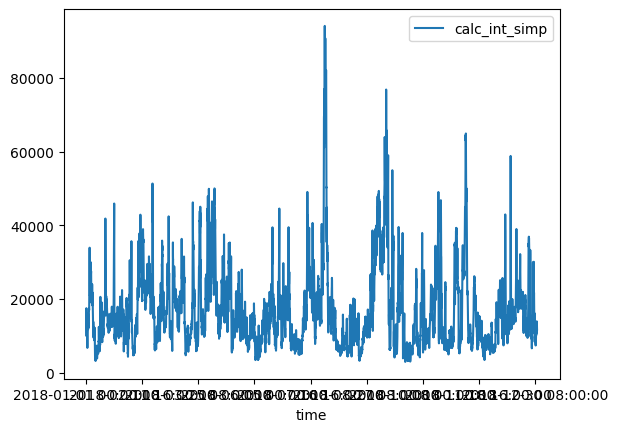

In [13]:
df_int_ifa.plot()

In [14]:
df_merge = pd.merge(df_int_zns, df_int_ifa, how="inner", on="time")

In [15]:
df_merge

,calc_int_simp_x,calc_int_simp_y
time,,
2018-01-01 00:00:00,4874.092594,10116.244826
2018-01-01 01:00:00,5275.037992,10772.673399
2018-01-01 02:00:00,6202.856657,12098.419186
2018-01-01 03:00:00,6712.680451,15212.964056
2018-01-01 04:00:00,6049.950077,17496.409120
...,...,...
2018-12-31 19:00:00,6469.857124,12948.685033
2018-12-31 20:00:00,6322.127966,12067.998252
2018-12-31 21:00:00,6123.187512,13051.565057


In [16]:
# посчитаем RMSE
np.sqrt(((df_merge["calc_int_simp_x"].to_numpy() - df_merge["calc_int_simp_y"].to_numpy()) ** 2).mean())

np.float64(6975.609077680913)

различие почти в два раза

## там действительно такие различия ?

<Axes: xlabel='time'>

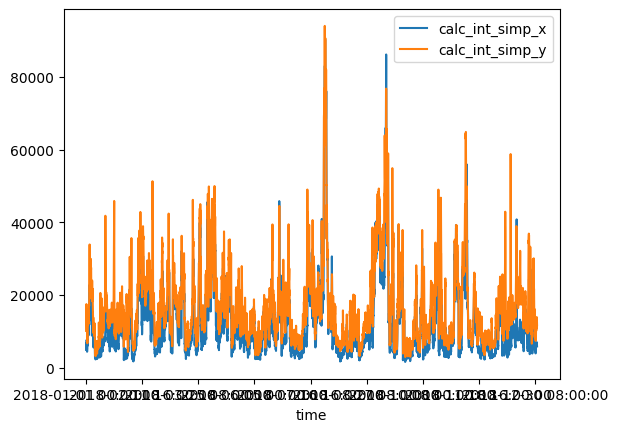

In [17]:
df_merge.plot()

## pm10, 2018 год

In [18]:
# читаем
df = pd.read_csv(Path(path_to_data, 
                      "result_pm10_2018.csv"))

#### ЗНС(55.7, 36.8)

In [19]:
# отсекаем координаты и сортируем
df_zns = df[(df['lat'] == 55.7) & (df['lon'] == 36.8)].sort_values(["time", "level"],
                                                                   ascending=True)

In [20]:
# создаём функцию агрегации, которая интегрирует методом Симпсона
def calc_int(x):
    substance = x["pm10"].to_list()
    lev = x["level"].to_list()
    return pd.Series({"calc_int_simp": simpson(y=substance, x=lev)})

In [21]:
df_int_zns = df_zns.groupby(["time"]).apply(calc_int, 
                                      include_groups=False)

In [22]:
df_int_zns.head()

,calc_int_simp
time,
2018-01-01 00:00:00,7548.942788
2018-01-01 01:00:00,7569.261388
2018-01-01 02:00:00,8567.999119
2018-01-01 03:00:00,9091.444208
2018-01-01 04:00:00,9591.823277


<Axes: xlabel='time'>

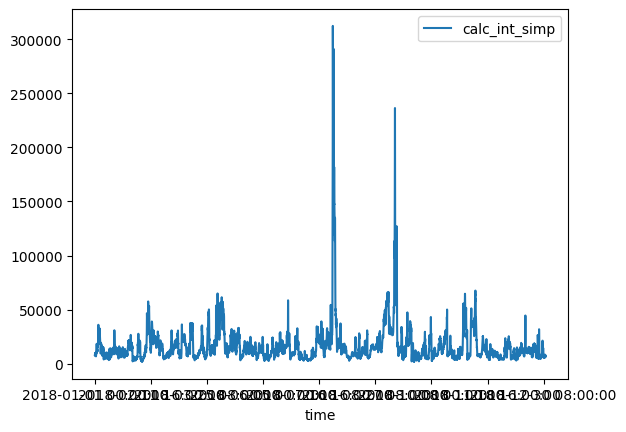

In [23]:
df_int_zns.plot()

#### ИФА(55.7, 37.5)

In [24]:
# отсекаем координаты и сортируем
df_ifa = df[(df['lat'] == 55.7) & (df['lon'] == 37.5)].sort_values(["time", "level"],
                                                                 ascending=True)

In [25]:
# создаём функцию агрегации, которая интегрирует методом Симпсона
def calc_int(x):
    substance = x["pm10"].to_list()
    lev = x["level"].to_list()
    return pd.Series({"calc_int_simp": simpson(y=substance, x=lev)})

In [26]:
df_int_ifa = df_ifa.groupby(["time"]).apply(calc_int, 
                                        include_groups=False)

In [27]:
df_int_ifa.head()

,calc_int_simp
time,
2018-01-01 00:00:00,14603.006877
2018-01-01 01:00:00,15074.298379
2018-01-01 02:00:00,15670.539115
2018-01-01 03:00:00,20160.242730
2018-01-01 04:00:00,22299.933431


<Axes: xlabel='time'>

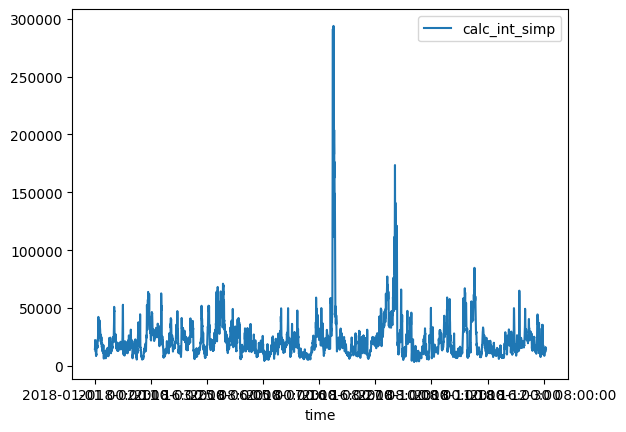

In [28]:
df_int_ifa.plot()

In [29]:
df_merge = pd.merge(df_int_zns, df_int_ifa, how="inner", on="time")

In [30]:
df_merge

,calc_int_simp_x,calc_int_simp_y
time,,
2018-01-01 00:00:00,7548.942788,14603.006877
2018-01-01 01:00:00,7569.261388,15074.298379
2018-01-01 02:00:00,8567.999119,15670.539115
2018-01-01 03:00:00,9091.444208,20160.242730
2018-01-01 04:00:00,9591.823277,22299.933431
...,...,...
2018-12-31 19:00:00,7480.282183,14857.796593
2018-12-31 20:00:00,7224.861030,13664.476158
2018-12-31 21:00:00,7065.767178,13867.072492


In [31]:
# посчитаем RMSE
np.sqrt(((df_merge["calc_int_simp_x"].to_numpy() - df_merge["calc_int_simp_y"].to_numpy()) ** 2).mean())

np.float64(8811.07737848835)

различие аналогично почти в два раза